<a href="https://colab.research.google.com/github/TinizaraRodriguez/_paddleOCR/blob/comparacion/_paddleOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install paddlepaddle paddleocr
!pip install opencv-python
!pip install paddlepaddle-gpu
!pip install paddleocr
!pip install easyocr
!pip install imutils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 13.5 MB/s eta 0:00:00


In [2]:
!wget http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.0g-2ubuntu4_amd64.deb
!sudo dpkg -i libssl1.1_1.1.0g-2ubuntu4_amd64.deb

--2023-10-08 16:42:06--  http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.0g-2ubuntu4_amd64.deb
Resolving archive.ubuntu.com (archive.ubuntu.com)... 185.125.190.36, 91.189.91.81, 185.125.190.39, ...
Connecting to archive.ubuntu.com (archive.ubuntu.com)|185.125.190.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1128092 (1.1M) [application/x-debian-package]
Saving to: ‘libssl1.1_1.1.0g-2ubuntu4_amd64.deb’

libssl1.1_1.1.0g-2u 100%[===================>]   1.08M  1.68MB/s    in 0.6s    

2023-10-08 16:42:07 (1.68 MB/s) - ‘libssl1.1_1.1.0g-2ubuntu4_amd64.deb’ saved [1128092/1128092]

Selecting previously unselected package libssl1.1:amd64.
(Reading database ... 120875 files and directories currently installed.)
Preparing to unpack libssl1.1_1.1.0g-2ubuntu4_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.0g-2ubuntu4) ...
Setting up libssl1.1:amd64 (1.1.0g-2ubuntu4) ...
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like p

In [3]:
!git clone https://github.com/PaddlePaddle/PaddleOCR

Cloning into 'PaddleOCR'...
remote: Enumerating objects: 47374, done.
remote: Counting objects: 100% (618/618), done.
remote: Compressing objects: 100% (382/382), done.
remote: Total 47374 (delta 389), reused 415 (delta 233), pack-reused 46756
Receiving objects: 100% (47374/47374), 345.16 MiB | 35.01 MiB/s, done.
Resolving deltas: 100% (33255/33255), done.


In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
import easyocr
import re
import regex

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:15<00:00, 257kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv3/multilingual/latin_PP-OCRv3_rec_infer.tar to /root/.paddleocr/whl/rec/latin/latin_PP-OCRv3_rec_infer/latin_PP-OCRv3_rec_infer.tar


100%|██████████| 10.2M/10.2M [00:19<00:00, 528kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:07<00:00, 297kiB/s]

[2023/10/08 16:44:01] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/latin/latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_p

[2023/10/08 16:44:13] ppocr DEBUG: dt_boxes num : 3, elapsed : 8.090953826904297
[2023/10/08 16:44:13] ppocr DEBUG: rec_res num  : 3, elapsed : 0.03113269805908203
[[[365.0, 516.0], [477.0, 516.0], [477.0, 535.0], [365.0, 535.0]], ('GC-1-3-94', 0.8874096870422363)]
[[[1323.0, 646.0], [1435.0, 646.0], [1435.0, 675.0], [1323.0, 675.0]], ('7GC-1110108', 0.8295850157737732)]
[[[101.0, 1341.0], [294.0, 1356.0], [291.0, 1393.0], [98.0, 1378.0]], ('CARMITA', 0.998406708240509)]


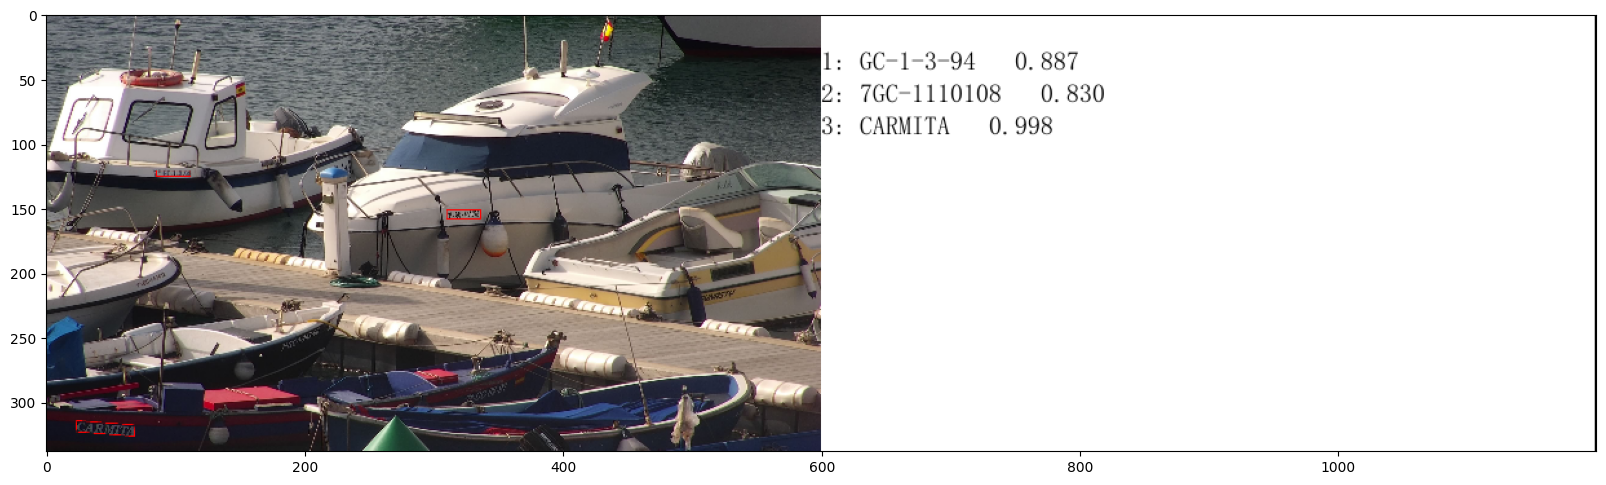

In [6]:
from paddleocr import PaddleOCR,draw_ocr
ocr = PaddleOCR(lang='es')
img_path = '/content/matriculas_varias.jpeg'
result = ocr.ocr(img_path, cls=False)
for idx in range(len(result)):
    res = result[idx]
    for line in res:
        print(line)

# draw result
from PIL import Image
result = result[0]
image = Image.open(img_path).convert('RGB')
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
im_show = draw_ocr(image, boxes, txts, scores, font_path='/content/PaddleOCR/doc/fonts/simfang.ttf')
im_show = Image.fromarray(im_show)


plt.figure(figsize=(20,20))
plt.imshow(im_show)
plt.show()

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

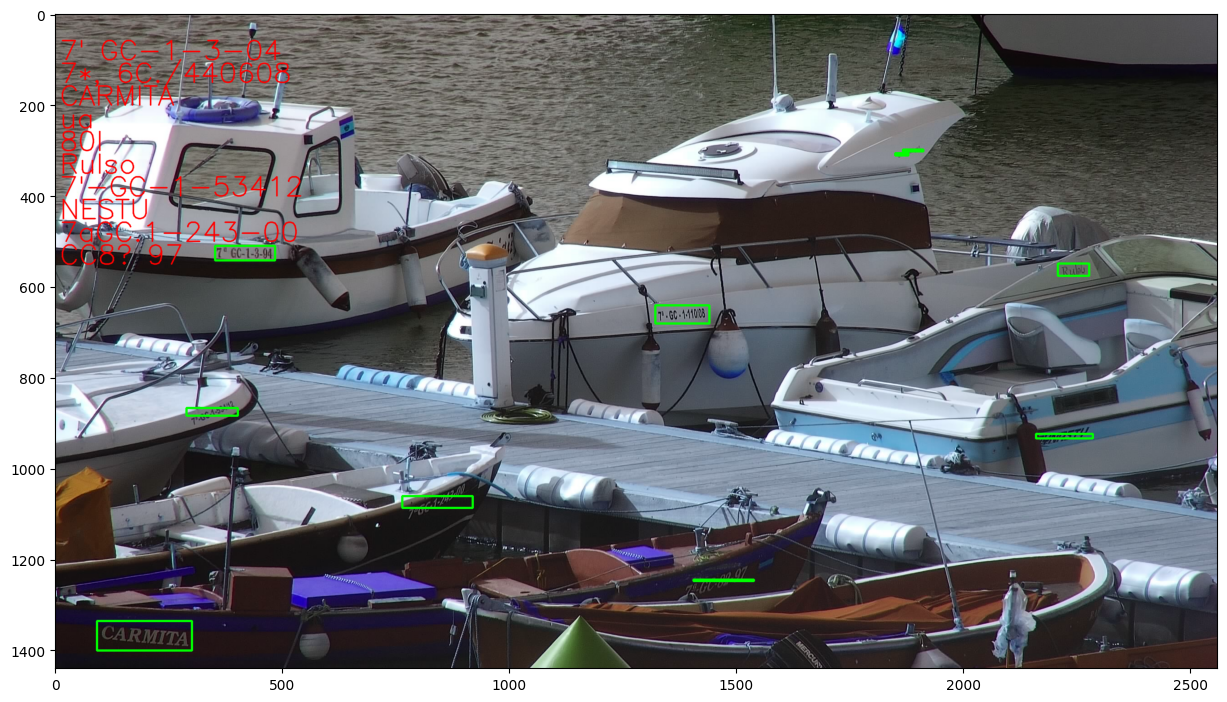

In [10]:
IMAGE_PATH = '/content/matriculas_varias.jpeg'
reader = easyocr.Reader(['es'])
result = reader.readtext(IMAGE_PATH)

img = cv2.imread(IMAGE_PATH)
spacer = 100
font = cv2.FONT_HERSHEY_SIMPLEX
#matriculas = r'^[0-9]{2}-[A-Z]{2}-[0-9]-[0-9]{1,3}-[0-9]{2}$'

for detection in result:
  #if re.match(matriculas, detection[1]):
    top_left = tuple(map(int, detection[0][0]))
    bottom_right = tuple(map(int, detection[0][2]))
    text = detection[1]
    #new_text = re.sub(r'9', "a", text, 1)
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(10,spacer), font, 2,(255,0,0),2,cv2.LINE_AA)
    spacer+=50
plt.figure(figsize=(15,15))
plt.imshow(img)
plt.show()